# Library Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [171]:
pd.set_option('display.max_rows', 500)

# Tracks Streaming Data

## Data Exploration / EDA

In [218]:
# let's load the tracks_df again
tracks_df = pd.read_csv('datasets/tracks_df.csv')
tracks_df.sample(5)

C:\Users\Kim\AppData\Local\Temp\ipykernel_18888\4189168743.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks_df = pd.read_csv('datasets/tracks_df.csv')


,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
101494,2022-08-17T04:05:18Z,"Android OS 11 API 30 (OnePlus, HD1910)",152898,JP,"Fuck The Pain Away (From ""Sex Education"")",Geek Music,"Fuck The Pain Away (From ""Sex Education"")",spotify:track:7lerqaaEpBrlzmP0p1jyXn,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1660708963043,False
97481,2022-06-19T23:34:00Z,"Android OS 11 API 30 (OnePlus, HD1910)",218335,ID,U Deserve,Wasia Project,U Deserve,spotify:track:1muiZAUjjzd3KShPWYspQM,NaN,NaN,NaN,trackdone,trackdone,False,NaN,True,1655678016107,False
124946,2023-08-27T19:05:14Z,android,169723,JP,Interlude III,Tessa Violet,Bad Ideas,spotify:track:2gKFOjYqtJpSsIXdRxZQfH,NaN,NaN,NaN,trackdone,trackdone,True,False,True,1693162943,False
80873,2021-08-01T04:19:28Z,"Android OS 10 API 29 (OnePlus, ONEPLUS A5010)",166024,JP,Head & Heart (feat. MNEK),Joel Corry,Head & Heart (feat. MNEK),spotify:track:6cx06DFPPHchuUAcTxznu9,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1627791400184,False
12923,2017-10-21T14:51:55Z,Windows 10 (10.0.14393; x64),0,ID,Dirty Harry,Gorillaz,Demon Days,spotify:track:2bfGNzdiRa1jXZRdfssSzR,NaN,NaN,NaN,fwdbtn,NaN,True,NaN,False,1508596904708,False


In [3]:
print(tracks_df.shape)
print(tracks_df.columns)

(129393, 18)
Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')


In [4]:
# let's take a look at the tracks_df again
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129393 entries, 0 to 129392
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 129393 non-null  object 
 1   platform                           129393 non-null  object 
 2   ms_played                          129393 non-null  int64  
 3   conn_country                       129393 non-null  object 
 4   master_metadata_track_name         129393 non-null  object 
 5   master_metadata_album_artist_name  129393 non-null  object 
 6   master_metadata_album_album_name   129393 non-null  object 
 7   spotify_track_uri                  129393 non-null  object 
 8   episode_name                       0 non-null       float64
 9   episode_show_name                  0 non-null       float64
 10  spotify_episode_uri                0 non-null       float64
 11  reason_start                       1293

Columns description
- ts : timestamp played
- ms_played : duration the track is played (ms)
- conn_country : country where the track was played
- master_metadata_track_name / artist_name / album_name : self explained
- spotify_track_uri : unique identifier for each track
- episode_name, episode_show_name, spotify_episode_uri : columns used for podcasts-related rows, might need to remove this later
- reason_start / end : a value telling why track is played
- shuffle / skipped / offline / incognito_mode : value whether the track if shuffle mode is used when the track is played, track skipped or when the track is played in offline mode or incognito_mode
- offline_timestamp : timestamp when the offline mode is used

In [5]:
# checking the number of unique from each column
tracks_df.nunique()

ts                                   121914
platform                                 32
ms_played                             26468
conn_country                              9
master_metadata_track_name             4783
master_metadata_album_artist_name      1646
master_metadata_album_album_name       2700
spotify_track_uri                      5245
episode_name                              0
episode_show_name                         0
spotify_episode_uri                       0
reason_start                              8
reason_end                               10
shuffle                                   2
skipped                                   4
offline                                   2
offline_timestamp                    127519
incognito_mode                            2
dtype: int64

In [6]:
# descriptive analysis for categorical data
tracks_df.describe(include='object')

,ts,platform,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,skipped
count,129393,129393,129393,129393,129393,129393,129393,129393,108855,23972
unique,121914,32,9,4783,1646,2700,5245,8,10,4
top,2019-06-28T06:57:01Z,"Android OS 11 API 30 (OnePlus, HD1910)",JP,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,Church Of Scars,spotify:track:1HW1arhhmKY3jI7QyARvsf,trackdone,trackdone,False
freq,208,21563,103209,762,11074,3173,762,96588,82153,17475


In [7]:
# descriptive analysis for numerical data
tracks_df.describe()

,ms_played,episode_name,episode_show_name,spotify_episode_uri,offline_timestamp
count,1.293930e+05,0.0,0.0,0.0,1.293930e+05
mean,1.569280e+05,NaN,NaN,NaN,1.268591e+12
std,9.212008e+04,NaN,NaN,NaN,6.274175e+11
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,9.120000e+04,NaN,NaN,NaN,1.498709e+12
50%,1.829730e+05,NaN,NaN,NaN,1.551874e+12
75%,2.162130e+05,NaN,NaN,NaN,1.610864e+12
max,1.082813e+06,NaN,NaN,NaN,1.665763e+12


<Axes: xlabel='ms_played', ylabel='Count'>

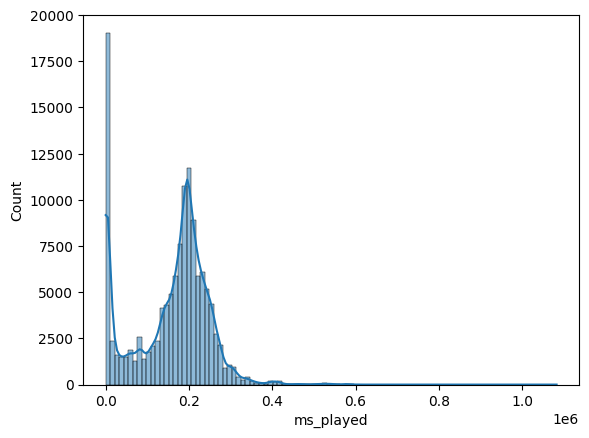

In [8]:
# histogram for ms_played rounded to nearest 1000 (in seconds) to see the distribution
sns.histplot(tracks_df['ms_played'].round(-3), kde = True, bins=100)

In [9]:
display(tracks_df[tracks_df['ms_played'] == 0].sample(5))
print(tracks_df[tracks_df['ms_played'] == 0].shape)

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
8849,2017-07-07T11:55:12Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,I Don't Know and I Don't Want to Know,In Love With a Ghost,Discography 2015-2016,spotify:track:600wewdSes7BMxXmm6UD7M,NaN,NaN,NaN,fwdbtn,NaN,True,NaN,False,1499428511363,False
128754,2023-11-06T06:09:01Z,android,0,JP,how can i pretend? - Demo,Wasia Project,how can i pretend?,spotify:track:4TKxkBv9vy8MgvHUUFVbH0,NaN,NaN,NaN,fwdbtn,backbtn,True,True,False,1699250939,False
13544,2017-11-06T11:51:33Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,Castle on the Hill,Ed Sheeran,÷,spotify:track:6PCUP3dWmTjcTtXY02oFdT,NaN,NaN,NaN,appload,NaN,True,NaN,False,1509969061690,False
22856,2018-05-26T13:39:37Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,Mr. Blue Sky,Electric Light Orchestra,Out of the Blue,spotify:track:2RlgNHKcydI9sayD2Df2xp,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1527341975948,False
24049,2018-06-09T08:30:40Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,I Just Loved You (feat. Tomppabeats & Oiseaubi...,In Love With a Ghost,Discography 2015-2016,spotify:track:51NwEhU00taacC9npdji7W,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1528533036354,False


(3759, 18)


there are surprisingly a lot of rows with 0 ms_played, might need to check it later

In [10]:
# checking platform unique values
tracks_df['platform'].value_counts(dropna=False)

platform
Android OS 11 API 30 (OnePlus, HD1910)                       21563
android                                                      20780
Android OS 9 API 28 (OnePlus, ONEPLUS A5010)                 15578
Android OS 10 API 29 (OnePlus, ONEPLUS A5010)                15124
Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)             10919
Windows 10 (10.0.17134; x64)                                  7099
Android OS 7.1.1 API 25 (Sony, E6683)                         6847
Windows 10 (10.0.14393; x64)                                  6764
Windows 10 (10.0.18363; x64)                                  6702
Android OS 7.0 API 24 (Sony, E6683)                           4074
windows                                                       3192
Windows 10 (10.0.18362; x64)                                  2858
Android OS 8.0.0 API 26 (OnePlus, ONEPLUS A5010)              1049
Windows 10 (10.0.16299; x64)                                  1011
Android OS 6.0.1 API 23 (Sony, E6683)                

it seems there are just 3 unique values in platform column (android, windows, web_player), we need to handle this value

In [11]:
# checking the unique values in 'skipped' column, including 'NaN'
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [13]:
# show the rows with 'skipped' value of 'NaN'
tracks_df[tracks_df['skipped'].isna()]['reason_end'].value_counts(dropna=False)

reason_end
trackdone                       62298
NaN                             20538
fwdbtn                           9239
backbtn                          4805
logout                           3845
endplay                          3118
remote                            966
unexpected-exit-while-paused      433
unexpected-exit                    64
trackerror                         63
unknown                            52
Name: count, dtype: int64

In [15]:
tracks_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [23]:
tracks_df[tracks_df['skipped'].isna() & tracks_df['reason_end'].isna()] \
[['master_metadata_track_name', 'master_metadata_album_artist_name', 'reason_end', 'skipped', 'ms_played']].sample(5)

,master_metadata_track_name,master_metadata_album_artist_name,reason_end,skipped,ms_played
632,Time Stops,Virtual Riot,NaN,NaN,262725
14612,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,NaN,NaN,148500
993,The Cabin,Ylvis,NaN,NaN,248158
12599,Everything Is Gonna Be Alright,Wyolica,NaN,NaN,234200
15564,Breathe (feat. Danyka Nadeau),Tut Tut Child,NaN,NaN,275121


we also need to handle 'skipped' value as it seems they are just a boolean data type and handle the NaN values

In [20]:
# checking the unique values in 'shuffle' column
tracks_df['shuffle'].value_counts(dropna=False)

shuffle
True     77246
False    52147
Name: count, dtype: int64

In [21]:
# checking the unique values in 'offline' column
tracks_df['offline'].value_counts(dropna=False)

offline
False    123422
True       5971
Name: count, dtype: int64

In [22]:
# checking the unique values in 'incognito_mode' column
tracks_df['incognito_mode'].value_counts(dropna=False)

incognito_mode
False    129076
True        317
Name: count, dtype: int64

shuffle, offline and incognito_mode's value are pretty much complete and has no NaN values

In [ ]:
# checking the unique values in 'reason_start' column
print(tracks_df['reason_start'].value_counts(dropna=False))

reason_start
trackdone     96588
fwdbtn        13695
backbtn        7344
clickrow       5919
appload        4161
remote          690
playbtn         649
trackerror      347
Name: count, dtype: int64


In [ ]:
# checking the unique values in 'reason_end' column
print(tracks_df['reason_end'].value_counts(dropna=False))

reason_end
trackdone                       82153
NaN                             20538
fwdbtn                          11078
backbtn                          5250
logout                           4835
endplay                          3750
remote                           1071
unexpected-exit-while-paused      533
unexpected-exit                    68
trackerror                         63
unknown                            54
Name: count, dtype: int64


based on what we've seen, there are some things that we need to handle:
- drop podcasts related columns [DONE]
- drop offline_timestamp column [DONE]
- ~~drop conn_country column since I think what _platform_ the track was streamed is more important than the _country_ it was streamed~~
- convert 'ts' column into datetime datatype [DONE]
- convert 'ts' based on the conn_country [DONE]
- create 'hour' and 'day_of_week" columns based on the local time
- rename columns with long label (master_metadata_artist_name, etc) into shorter form [DONE]
- trim spotify_track_uri to only track ids [DONE]
- handle _platform_ into three values (web_player, android, windows) [DONE]
- handle _skipped_ into True or False
- handle _skipped_'s NaN value based on _reason end_
- take a look on rows with 0 ms_played 

## Data Preprocessing

### dropping unimportant columns

In [219]:
# dropping the columns that are not useful
tracks_df.drop(columns=['offline_timestamp', 'episode_name', 'episode_show_name', 'spotify_episode_uri'], inplace=True)


### handling 'ts' and 'conn_country' column
there are some things that we need to do here:
- convert 'ts' to datetime
- check unique values of conn_country
- fix the mislabelled rows
- convert 'ts' into its proper timezone

In [220]:
# converting 'ts' to datetime format
tracks_df['ts'] = pd.to_datetime(tracks_df['ts'])

In [221]:
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103209
ID     24904
SG       614
MY       334
PH       279
CA        32
US        13
ZZ         5
BV         3
Name: count, dtype: int64

it appears that conn_country are mislabelled, because I have never been to CA / US / ZZ / BV.
this mislabelling might caused by some error or because I happened to be on vpn while listening to spotify.
since the quantity of mislabelled rows are not that significant, we can just remove these rows.

but I will see if we can assign them accordingly (since the quantity is also not that many)

In [222]:
# store the date of rows with 'conn_country' value of CA, US, ZZ and BV into a list
mislabelled_conn_country_date = tracks_df[tracks_df['conn_country'].isin(['CA', 'US', 'ZZ', 'BV'])]['ts'].dt.date.unique().tolist()

In [223]:
mislabelled_conn_country_date

[datetime.date(2017, 8, 25),
 datetime.date(2017, 11, 6),
 datetime.date(2018, 7, 27),
 datetime.date(2019, 10, 22),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 11, 28),
 datetime.date(2021, 12, 2),
 datetime.date(2022, 6, 17),
 datetime.date(2022, 7, 17),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 12, 10),
 datetime.date(2023, 1, 19),
 datetime.date(2023, 1, 29)]

In [224]:
# show the unique value of conn_country on each day in the list and store the most frequent value into a dictionary of date:country
conn_country_dict = {}
for date in mislabelled_conn_country_date:
    conn_country_dict[date] = tracks_df[tracks_df['ts'].dt.date == date]['conn_country'].value_counts().index[0]

In [225]:
conn_country_dict

{datetime.date(2017, 8, 25): 'ID',
 datetime.date(2017, 11, 6): 'ID',
 datetime.date(2018, 7, 27): 'JP',
 datetime.date(2019, 10, 22): 'JP',
 datetime.date(2021, 8, 31): 'JP',
 datetime.date(2021, 9, 1): 'JP',
 datetime.date(2021, 11, 28): 'JP',
 datetime.date(2021, 12, 2): 'JP',
 datetime.date(2022, 6, 17): 'JP',
 datetime.date(2022, 7, 17): 'ID',
 datetime.date(2022, 8, 25): 'JP',
 datetime.date(2022, 12, 10): 'JP',
 datetime.date(2023, 1, 19): 'JP',
 datetime.date(2023, 1, 29): 'JP'}

In [226]:
# replace the mislabelled conn_country with the correct country
tracks_df['conn_country'] = tracks_df.apply(lambda x: conn_country_dict[x['ts'].date()] if x['conn_country'] in ['CA', 'US', 'ZZ', 'BV'] else x['conn_country'], axis=1)

In [227]:
# check the unique values in 'conn_country' column again
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103256
ID     24910
SG       614
MY       334
PH       279
Name: count, dtype: int64

In [228]:
import pytz

In [229]:
# Function to convert timezone and extract hour and day of week
def convert_and_extract(row):
    # Get the appropriate timezone
    country_tz = pytz.country_timezones(row['conn_country'])[0]
    local_time = row['ts'].tz_convert(pytz.timezone(country_tz))
    
    # Extract the information
    hour = local_time.hour
    day_of_week_str = local_time.strftime('%A')
    day_of_week_int = local_time.weekday()
    local_date = local_time.day
    local_month = local_time.month
    local_year = local_time.year
    
    return pd.Series([local_time, hour, day_of_week_str, day_of_week_int, local_date, local_month, local_year])


In [230]:
# Apply the function to extract local time, hour, and day of week
tracks_df[['ts_local', 'hour', 'day_of_week_str', 'day_of_week_int', 'local_date', 'local_month', 'local_year']] = tracks_df.apply(convert_and_extract, axis=1)

In [231]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,...,skipped,offline,incognito_mode,ts_local,hour,day_of_week_str,day_of_week_int,local_date,local_month,local_year
124856,2023-08-27 00:53:09+00:00,android,169723,JP,Interlude III,Tessa Violet,Bad Ideas,spotify:track:2gKFOjYqtJpSsIXdRxZQfH,trackdone,trackdone,...,False,False,False,2023-08-27 09:53:09+09:00,9,Sunday,6,27,8,2023
27308,2018-07-25 18:02:17+00:00,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",169859,JP,Odyssey (feat Danyka Nadeau) - Jimny Remix,Televisor,Odyssey (ft.Danyka Nadeau) The Remixes,spotify:track:43xM2BybusaJcpm01yCuO0,trackdone,trackdone,...,NaN,False,False,2018-07-26 03:02:17+09:00,3,Thursday,3,26,7,2018
54502,2020-01-17 20:45:42+00:00,Windows 10 (10.0.18362; x64),126693,JP,Jagoan,Sherina Munaf,PETUALANGAN Sherina: Lihatlah Lebih Dekat,spotify:track:1Yqn7WFPxB5FoKmFJfNCV4,trackdone,trackdone,...,NaN,False,False,2020-01-18 05:45:42+09:00,5,Saturday,5,18,1,2020
20042,2018-03-20 06:39:50+00:00,"Android OS 8.0.0 API 26 (OnePlus, ONEPLUS A5010)",109240,ID,Ververg,Onoken,Testimony Cytus | Deemo,spotify:track:4qi8cFqQCICowuvtSCre1U,trackdone,NaN,...,NaN,False,False,2018-03-20 13:39:50+07:00,13,Tuesday,1,20,3,2018
106718,2022-11-15 08:38:58+00:00,android,195081,JP,No Big Deal (I Love You),dodie,Hot Mess,spotify:track:71kcVvSxf0QVp2uto4EsHn,trackdone,trackdone,...,0.0,False,False,2022-11-15 17:38:58+09:00,17,Tuesday,1,15,11,2022


In [232]:
# show 5 rows for each conn_country
for country in tracks_df['conn_country'].unique():
    print(country)
    display(tracks_df[tracks_df['conn_country'] == country][['ts', 'ts_local', 'hour', 'day_of_week_str', 'conn_country']].sample(5))

ID


,ts,ts_local,hour,day_of_week_str,conn_country
4136,2017-04-10 15:57:58+00:00,2017-04-10 22:57:58+07:00,22,Monday,ID
2836,2017-03-18 08:50:35+00:00,2017-03-18 15:50:35+07:00,15,Saturday,ID
99358,2022-07-15 02:23:55+00:00,2022-07-15 09:23:55+07:00,9,Friday,ID
10863,2017-09-20 04:56:57+00:00,2017-09-20 11:56:57+07:00,11,Wednesday,ID
5982,2017-05-10 07:57:45+00:00,2017-05-10 14:57:45+07:00,14,Wednesday,ID


JP


,ts,ts_local,hour,day_of_week_str,conn_country
54267,2020-01-08 05:48:05+00:00,2020-01-08 14:48:05+09:00,14,Wednesday,JP
44098,2019-05-01 09:30:12+00:00,2019-05-01 18:30:12+09:00,18,Wednesday,JP
106636,2022-11-11 17:46:10+00:00,2022-11-12 02:46:10+09:00,2,Saturday,JP
123647,2023-08-07 08:29:17+00:00,2023-08-07 17:29:17+09:00,17,Monday,JP
67692,2020-10-09 06:49:34+00:00,2020-10-09 15:49:34+09:00,15,Friday,JP


MY


,ts,ts_local,hour,day_of_week_str,conn_country
43197,2019-04-15 19:53:09+00:00,2019-04-16 03:53:09+08:00,3,Tuesday,MY
119905,2023-06-15 04:18:02+00:00,2023-06-15 12:18:02+08:00,12,Thursday,MY
43122,2019-04-15 19:53:09+00:00,2019-04-16 03:53:09+08:00,3,Tuesday,MY
43813,2019-04-28 02:27:59+00:00,2019-04-28 10:27:59+08:00,10,Sunday,MY
43211,2019-04-15 19:53:10+00:00,2019-04-16 03:53:10+08:00,3,Tuesday,MY


SG


,ts,ts_local,hour,day_of_week_str,conn_country
110985,2023-01-30 03:55:26+00:00,2023-01-30 11:55:26+08:00,11,Monday,SG
111049,2023-01-30 09:09:28+00:00,2023-01-30 17:09:28+08:00,17,Monday,SG
111087,2023-01-30 11:14:03+00:00,2023-01-30 19:14:03+08:00,19,Monday,SG
121159,2023-06-27 13:23:09+00:00,2023-06-27 21:23:09+08:00,21,Tuesday,SG
121199,2023-06-27 18:42:32+00:00,2023-06-28 02:42:32+08:00,2,Wednesday,SG


PH


,ts,ts_local,hour,day_of_week_str,conn_country
99869,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
97363,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
97328,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
97312,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
97264,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH


### renaming columns with long label

In [233]:
# renaming master_metadata_track_name, master_metadata_album_artist_name, and master_metadata_album_album_name into track_name, artist_name, and album_name
tracks_df.rename(columns={'master_metadata_track_name':'track_name', 'master_metadata_album_artist_name':'artist_name', 'master_metadata_album_album_name':'album_name'}, inplace=True)

In [234]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,...,skipped,offline,incognito_mode,ts_local,hour,day_of_week_str,day_of_week_int,local_date,local_month,local_year
57393,2020-04-10 06:08:44+00:00,"Android OS 9 API 28 (OnePlus, ONEPLUS A5010)",139785,JP,Bella Ciao - Música Original de la Serie la Ca...,Manu Pilas,Bella Ciao (Música Original de la Serie la Cas...,spotify:track:3lWzVNe1yFZlkeBBzUuZYu,trackdone,trackdone,...,NaN,False,False,2020-04-10 15:08:44+09:00,15,Friday,4,10,4,2020
47125,2019-07-06 02:08:26+00:00,"Android OS 9 API 28 (OnePlus, ONEPLUS A5010)",5614,JP,Melompat Lebih Tinggi,Sheila On 7,OST. 30 Hari Mencari Cinta,spotify:track:7Hun5YHQ5TEe9j97cU5XPg,trackdone,backbtn,...,NaN,False,False,2019-07-06 11:08:26+09:00,11,Saturday,5,6,7,2019
85161,2021-10-26 04:38:41+00:00,"Android OS 11 API 30 (OnePlus, HD1910)",124766,JP,Like I Did with You - Acoustic,Us The Duo,Like I Did with You (Acoustic),spotify:track:5rCphRwV7QvlV1agT8ZYgc,trackdone,trackdone,...,NaN,False,False,2021-10-26 13:38:41+09:00,13,Tuesday,1,26,10,2021
10655,2017-08-30 16:55:15+00:00,Windows 10 (10.0.14393; x64),221520,ID,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,trackdone,NaN,...,NaN,False,False,2017-08-30 23:55:15+07:00,23,Wednesday,2,30,8,2017
65594,2020-09-10 22:12:04+00:00,"Android OS 10 API 29 (OnePlus, ONEPLUS A5010)",210049,JP,Jarak,Novécaine,Jarak,spotify:track:5buqrm5InTWtAqI4eQtbMb,trackdone,trackdone,...,NaN,False,False,2020-09-11 07:12:04+09:00,7,Friday,4,11,9,2020


### handling platform columns

In [235]:
# trim the platform values to only the first word and make it lowercase
tracks_df['platform'] = tracks_df['platform'].str.split().str[0].str.lower()

# replace 'partner' value in platform column with 'web_player'
tracks_df['platform'].replace('partner', 'web_player', inplace=True)

C:\Users\Kim\AppData\Local\Temp\ipykernel_18888\3275832675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks_df['platform'].replace('partner', 'web_player', inplace=True)


In [236]:
tracks_df['platform'].value_counts()

platform
android       97301
windows       32015
web_player       77
Name: count, dtype: int64

### handling spotify_track_uri to only track_id

In [237]:
# trim spotify_track_uri to only the track id and rename the column into track_id
tracks_df['spotify_track_uri'] = tracks_df['spotify_track_uri'].str.split(':').str[2]
tracks_df.rename(columns={'spotify_track_uri':'track_id'}, inplace=True)

In [238]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,...,skipped,offline,incognito_mode,ts_local,hour,day_of_week_str,day_of_week_int,local_date,local_month,local_year
62892,2020-07-31 12:55:30+00:00,android,71286,JP,the end (rejected demo),In Love With a Ghost,Playful Spirits,2U2gdT333c0wq5FOLm8JQE,trackdone,trackdone,...,NaN,False,False,2020-07-31 21:55:30+09:00,21,Friday,4,31,7,2020
7544,2017-06-02 13:15:30+00:00,android,234666,ID,We'll Be Together,In Love With a Ghost,Discography 2015-2016,3nhBvq3wC6zsNf23cYvXFT,trackdone,NaN,...,NaN,False,False,2017-06-02 20:15:30+07:00,20,Friday,4,2,6,2017
45047,2019-05-18 08:52:47+00:00,android,82385,JP,Sentient,Riouth,Sentient,6hJVB5crm0kZqOH1ZeTmly,appload,trackdone,...,NaN,False,False,2019-05-18 17:52:47+09:00,17,Saturday,5,18,5,2019
92396,2022-03-08 09:47:16+00:00,android,201875,JP,Digital Persona,Chilli Beans.,d a n c i n g a l o n e,23O1hrpAhAvw8zCmO6izy9,trackdone,trackdone,...,NaN,False,False,2022-03-08 18:47:16+09:00,18,Tuesday,1,8,3,2022
30258,2018-09-19 15:52:21+00:00,windows,263448,JP,The Imperial March - Pegboard Nerds Remix,Celldweller,The Imperial March,7cE8VabTiFSjD2FSf6xrOx,trackdone,trackdone,...,NaN,False,False,2018-09-20 00:52:21+09:00,0,Thursday,3,20,9,2018


In [239]:
# let's save the current tracks_df into a new csv file
tracks_df.to_csv('datasets/tracks_df_cleaned.csv', index=False)

### handling 'skipped' column
there are few things that we need to do here:
- turn the values into True/False to make it uniform with other columns
- assign NaN rows with its correct value as many as possible using reason_end and track's duration 

In [402]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [403]:
# transform the 'skipped' column into boolean type so that it is easier to work with
tracks_df['skipped'] = tracks_df['skipped'].replace({'False': False, '0.0': False, 'True': True, '1.0': True})
tracks_df['skipped'] = tracks_df['skipped'].astype('boolean') #so that it can store True, False, and NaN

In [404]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
<NA>     105421
False     21056
True       2916
Name: count, dtype: Int64

In [405]:
# first, let's see the combination of 'skipped' and 'reason_end' values, including 'NaN'
tracks_df.groupby(['skipped', 'reason_end'], dropna=False).size().unstack()

reason_end,backbtn,endplay,fwdbtn,logout,remote,trackdone,trackerror,unexpected-exit,unexpected-exit-while-paused,unknown,NaN
skipped,,,,,,,,,,,
False,NaN,NaN,NaN,990.0,105.0,19855.0,NaN,4.0,100.0,2.0,NaN
True,445.0,632.0,1839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<NA>,4805.0,3118.0,9239.0,3845.0,966.0,62298.0,63.0,64.0,433.0,52.0,20538.0


based on the table above, we can see that:
- Skipped == False happens mostly when the reason_end of the track is either trackdone, or the user exit the apps
- Skipped == True happens when the user pressed the backbutton, endplay or forwardbutton to either navigate to other song, pause or replay the song (pressing backbutton here means that the track will be replayed from the beginning)
based on this finding, we can fill a part of NaN value of the 'skipped' columns

In [406]:
# Define a function to fill NaN in 'skipped' based on 'reason_end'
def fill_skipped(row):
    if pd.isna(row['skipped']):
        if row['reason_end'] in ['fwdbtn', 'backbtn', 'endplay']:
            return True 
        elif row['reason_end'] in ['logout', 'remote', 'trackdone', 'trackerror', 'unexpected-exit', 'unexpected-exit-while-paused']:
            return False
    return row['skipped'] # Return the original value if not NaN or reason_end is not in the specified list


In [407]:
# Apply the function row by row
tracks_df['skipped'] = tracks_df.apply(fill_skipped, axis=1)

In [408]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
False    88725
<NA>     20590
True     20078
Name: count, dtype: int64

In [409]:
tracks_df[tracks_df['skipped'].isna()]['reason_end'].value_counts(dropna=False)

reason_end
NaN        20538
unknown       52
Name: count, dtype: int64

we managed to fill some missing information based on reason_end, let's continue filling the rest using track's duration

In [410]:
# get track_info to get each track information
track_info = pd.read_csv('datasets/tracks_info_df.csv')
# let's keep the columns that we need only
track_info = track_info[['track_id', 'duration_ms']]
display(track_info.sample(5))

,track_id,duration_ms
3923,086zmc265JWZZij1KpxQOb,231373
646,1hWrl3T1kIH5b9zRHLfCOn,148573
1222,2tbzFKHqykyCWAbzFKcc9v,119076
3476,3iDS9nw8qwFe74VROaORZC,110117
4731,1Cxx2ec6iADMThJFeKSOzl,162046


In [411]:
# get the duration from track_info and merge it with tracks_df based on track_id
tracks_df = tracks_df.merge(track_info, on='track_id', how='left')
tracks_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'track_name',
       'artist_name', 'album_name', 'track_id', 'reason_start', 'reason_end',
       'shuffle', 'skipped', 'offline', 'incognito_mode', 'ts_local', 'hour',
       'day_of_week_str', 'day_of_week_int', 'local_date', 'local_month',
       'local_year', 'duration_ms'],
      dtype='object')

In [412]:
tracks_df['ms_played_ratio'] = tracks_df['ms_played'] / tracks_df['duration_ms']

In [413]:
# store a label for a shorter syntax
skipped_labels = ['track_id', 'artist_name', 'track_name', 'reason_start', 'reason_end', 'skipped', 'ms_played', 'duration_ms']

In [414]:
tracks_df[(tracks_df['reason_end'] == 'trackdone')
          & (tracks_df['ms_played'] < tracks_df['duration_ms'])] \
            [skipped_labels].sample(5)

,track_id,artist_name,track_name,reason_start,reason_end,skipped,ms_played,duration_ms
71680,5M8tCPBRAGdAVAyKIaEh9l,Darren Korb,In the Blood,trackdone,trackdone,False,250219,250237
87218,1WBAKisvCxR2IQ2knIAlyw,Sheila On 7,Pejantan Tangguh,fwdbtn,trackdone,False,207123,207133
78751,2QDiQ50Xv9ICj8lINq1YDK,The Star-Lord’s,Come and Get Your Love,trackdone,trackdone,False,210977,211000
93704,7iKZd4d4JEPfAYdIKtRLYH,Bishop Briggs,Art of Survival,trackdone,trackdone,False,181674,181686
73931,0G25jiypLyljfwPI6L0U6T,Daniela Andrade,Telegraph Ave / Sober,trackdone,trackdone,False,166534,166542


In [415]:
tracks_df[(tracks_df['reason_end'].isna())] \
            [skipped_labels + ['ms_played_ratio']].sort_values('ms_played_ratio', ascending=True).head(10)

,track_id,artist_name,track_name,reason_start,reason_end,skipped,ms_played,duration_ms,ms_played_ratio
6561,6SFV8lSwWqAOtitaFzEoaF,In Love With a Ghost,Crystal,backbtn,NaN,<NA>,0,171182,0.0
6733,2F8nJ7yF9GN5ONBHnmzy1h,The Changcuters,Racun Dunia,fwdbtn,NaN,<NA>,0,274466,0.0
6734,6dNXnOl9Oj7wPLjXG13Ar4,Nike Ardilla,Bintang Kehidupan,fwdbtn,NaN,<NA>,0,266919,0.0
6735,3M0RfjqAJZ1f6qXJkP1Uej,Efek Rumah Kaca,Sebelah Mata,fwdbtn,NaN,<NA>,0,269757,0.0
6736,2oTDOIAdsxPTE7yAp4YOcv,House Of Pain,Jump Around,fwdbtn,NaN,<NA>,0,214946,0.0
6476,2COBMrpsGXEagCGkjp2Siz,Limes,Jovial,trackdone,NaN,<NA>,0,142727,0.0
6621,2j3g68OQNQKEmQW7kDJeKO,Pink Guy,Goofy's Trial,appload,NaN,<NA>,0,166402,0.0
6747,3821tdFqPQeJNYxryIqIev,The Changcuters,Hijrah Ke London,fwdbtn,NaN,<NA>,0,205706,0.0
2228,4AP0fHeJ9MRGiS1i1xlw7Y,Rootkit,Real Love (feat. Danyka Nadeau),fwdbtn,NaN,<NA>,0,275409,0.0
2229,204PudWeSLHxVwOkune8mr,Au5,Inside (feat. Danyka Nadeau),fwdbtn,NaN,<NA>,0,289970,0.0


<Axes: xlabel='ms_played_ratio', ylabel='Count'>

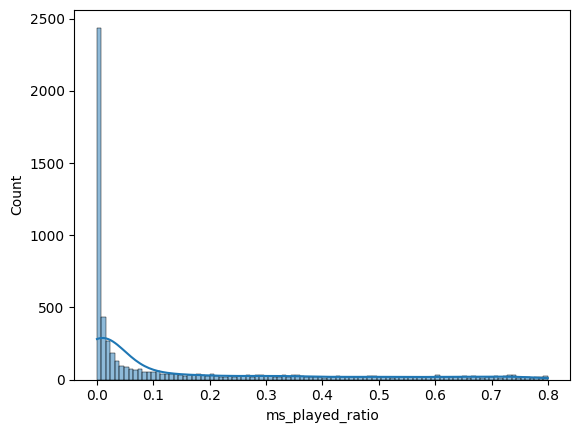

In [416]:
# visualize the distribution of ms_played_diff for skipped == nan
sns.histplot(tracks_df[(tracks_df['skipped'].isna()) &
                       (tracks_df['ms_played_ratio'] < 0.8)]['ms_played_ratio'], kde=True, bins=100)

In [419]:
tracks_df[(tracks_df['ms_played_ratio'] < 0.9) &
          (tracks_df['skipped'].isna())][skipped_labels + ['ms_played_ratio']].sample(10)

,track_id,artist_name,track_name,reason_start,reason_end,skipped,ms_played,duration_ms,ms_played_ratio
3286,12mGwph2YzDIlChtq3EdXP,Marshmello,Alone,trackdone,NaN,<NA>,23012,273802,0.084046
4634,7zvKFw17XyoBUx9mHiwzPy,Pink Guy,Rice Balls,trackdone,NaN,<NA>,17248,196173,0.087922
4705,5hYTyyh2odQKphUbMqc5gN,Alessia Cara,"How Far I'll Go - From ""Moana""",trackdone,NaN,<NA>,147511,175517,0.840437
8766,3gfBrvyk35gtmZhjbSvNyb,In Love With a Ghost,Don't Cry Kate,fwdbtn,NaN,<NA>,2827,192000,0.014724
10010,6HH1qlyyVAAJzbctS0OYKB,Kana Nishino,No.1,trackdone,NaN,<NA>,223009,252000,0.884956
7053,5VnaOLeK1lKfULuNwet8ck,In Love With a Ghost,Flowers,trackdone,NaN,<NA>,3939,252121,0.015623
12751,0SxZpiF1BfbLiKJAamelYz,Fight Like Apes,I'm Beginning To Think You Prefer Beverly Hill...,clickrow,NaN,<NA>,34100,203413,0.167639
2631,5Dk2YjSwm9U2WC1nsFuwrD,Excision,Bring the Madness (Noisestorm Remix) [feat. Ma...,trackdone,NaN,<NA>,4853,240000,0.020221
5995,1xxlEIFljtiUYVXufYup84,In Love With a Ghost,Can I Be Your Internet Crush,trackdone,NaN,<NA>,37702,205090,0.183831
8157,51NwEhU00taacC9npdji7W,In Love With a Ghost,I Just Loved You (feat. Tomppabeats & Oiseaubi...,fwdbtn,NaN,<NA>,810,114000,0.007105


In [420]:
tracks_df[(tracks_df['ms_played_ratio'] > 2) &
          (tracks_df['skipped'] == True)][skipped_labels + ['ms_played_ratio']].sample(5)

,track_id,artist_name,track_name,reason_start,reason_end,skipped,ms_played,duration_ms,ms_played_ratio
89259,2O7FC4XbIrJ6Ib8bsq0FYC,Us The Duo,Near Or Far,trackdone,fwdbtn,True,1044406,219306,4.762323
116668,2TF4PgOMbINYKMdQpCO1bm,Pomplamoose,Sweet Dreams Seven Nation Army Mashup,trackdone,fwdbtn,True,314805,153000,2.057549
97229,4X1heoe3QkaLpCCvx7mmmV,Wasia Project,how can i pretend? - Demo,trackdone,backbtn,True,225060,84624,2.659529
114077,5DGgATX8r6d53OU6eT0Dzt,Lawrence,Don't Lose Sight (Acoustic),trackdone,fwdbtn,True,1082813,406186,2.665806
111393,2YIsnl3xxvV34QgnT9HLCY,dodie,Special Girl,trackdone,backbtn,True,413311,193423,2.136824


In [421]:
# let's fill the rest of NaN with an assumption that if the ms_played_ratio is less than 0.9, then the track is considered skipped
def fill_skipped_nan(row):
    if row['ms_played_ratio'] < 0.9:
        return True
    return False

In [422]:
tracks_df.loc[tracks_df['skipped'].isna(), 'skipped'] = tracks_df[tracks_df['skipped'].isna()].apply(fill_skipped_nan, axis=1)

In [423]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
False    103095
True      26298
Name: count, dtype: int64

### (optional) replacing 'skipped' column from spotify entirely with 'is_skipped' based on ms_played_ratio
tbh, the number of missing information in 'skipped' column is too many and some might think it's too much hassle to fill the missing information and even if we did, the data might not be that reliable because the value is filled using different assumption
we can also create an entire new column of 'is_skipped' based on previous ms_played_ratio assumption so that we have a generalized assumption

In [424]:
# using ms_played_ratio to create 'is_skipped' column
tracks_df['is_skipped'] = tracks_df['ms_played_ratio'] < 0.9

In [426]:
# let's compare the 'skipped' and 'is_skipped' columns
tracks_df[['skipped', 'is_skipped']].value_counts()

skipped  is_skipped
False    False         94955
True     True          25798
False    True           8140
True     False           500
Name: count, dtype: int64

# Lyrics data

## Data Cleaning/Preprocessing

In [3]:
# let's load the lyrics data that we have scraped from Genius (through LyricsGenius)
lyrics_df = pd.read_csv('datasets/lyrics_data.csv')
lyrics_df.rename(columns={'Unnamed: 0':'track_id'}, inplace=True)

In [4]:
lyrics_df.isna().sum()

track_id             0
title_genius      1574
artist_genius     1574
title_spotify        0
artist_spotify       0
lyrics            1574
dtype: int64

In [5]:
# remove rows with NaN in lyrics column
lyrics_df.dropna(subset=['lyrics'], inplace=True)

In [6]:
# rows mismatched artist_genius and artist_spotify
mismatched_artists = lyrics_df[lyrics_df['artist_genius'] != lyrics_df['artist_spotify']]
display(mismatched_artists.head(5))
display(mismatched_artists.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
7,1ip1SN4tWX0qMgE1KgIF52,Collision Mix,Monstercat,Calling Out (feat. KG & Skyelle),MUZZ,3 ContributorsCollision Mix Lyrics00:00TimeSna...
9,1uy20tUwglZ4hapeq50jSL,Essays of Michel de Montaigne (Chap. 2.12),Michel de Montaigne,Saving My Love - Stfu Mix,Twin Pack,4 ContributorsEssays of Michel de Montaigne (C...
11,2nYxM6Di7mhBTv26K887fQ,Drinks Up,G-Eazy,Sky,Goose house,7 ContributorsDrinks Up Lyrics[Chorus]\r\nGot ...
13,6mPGkCjfAZ1PR52RBxXumL,En Privado,Mike Oxlong,”JUST FRIENDS”?,Goose house,1 ContributorEn Privado Lyrics[Intro: RJ Ghost...
14,167PWPhEUGgTXuRkRCCCSD,The Recession Lesson,"Khushal Kalidindi, Ashwin Kumar","Fly High, So High",Goose house,2 ContributorsThe Recession Lesson Lyrics[Vers...


(1837, 6)

In [7]:
# rows where artist_genius and artist_spotify are different, but one is a substring of the other
within_substring = mismatched_artists.apply(lambda row: row['artist_spotify'].lower() in row['artist_genius'].lower() 
                            or row['artist_genius'].lower() in row['artist_spotify'].lower(), axis=1)
mismatched_artists[within_substring].shape

(542, 6)

In [8]:
mismatched_artists[within_substring][['artist_genius', 'artist_spotify']].sample(5)

,artist_genius,artist_spotify
855,ゆのみ (Yunomi),Yunomi
4655,​ella jane,ella jane
5061,Stealth (UK),Stealth
4799,beabadoobee & Oscar Lang,beabadoobee
2727,​sad boy with a laptop,sad boy with a laptop


In [9]:
# get the rows with matched artist_genius and artist_spotify, and the rows in within_substring
correct_artist_lyrics = lyrics_df[(lyrics_df['artist_genius'] == lyrics_df['artist_spotify']) | within_substring]

In [10]:
display(correct_artist_lyrics.sample(5))
display(correct_artist_lyrics.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
4882,1LIaXS82jVxkZQdXbfM5QH,Astronaut Kids,Hotel Fiction,Astronaut Kids,Hotel Fiction,3 ContributorsAstronaut Kids Lyrics[Verse 1]\n...
4181,6oPbtiso9fJpfJ3Z6hqnX9,眠りの森 (Nemuri no Mori),Aimer,眠りの森,Aimer,1 ContributorTranslationsRomanization眠りの森 (Nem...
4825,6huaXgODnR4m9rfVhGqsGf,Allie,NoSo,Allie,NoSo,3 ContributorsAllie LyricsPaint\nBlue stars on...
1025,0DW3HWn2qCPc5e0Chh8cOU,Can’t Forget You,San Holo,Can't Forget You (feat. The Nicholas),San Holo,6 ContributorsCan’t Forget You Lyrics[Verse 1]...
4886,3BmaFHt6q91CmMrA7fLLRC,Petals on the Moon,Wasia Project,Petals on the Moon,Wasia Project,8 ContributorsPetals on the Moon Lyrics[Verse ...


(2374, 6)

In [11]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[47]['lyrics']

"13 ContributorsTranslationsRomanization\u200bninelie Lyrics[Aimer「ninelie (feat. chelly from EGOIST)」歌詞]\n\n[Verse 1: Aimer]\n君を繋ぐ空の星が\n一つ音を立てても\nどれも同じ雨に濡れた\n夢ばかり 乾くだけの光\n\n[Pre-Chorus: chelly, chelly & Aimer]\n相手をなぞる答えに疲れた\n繰り返す陽の無い夜明けに崩れた朝\n\n[Chorus: Aimer, chelly]\n捕まえた daydream\n出遅れたストーリーと\n栄光がどこへ叫び唱えても\n荒れたトンネル\n声もくぐれない\nだからサイレンス 灯すためと\n\n[Verse 2: chelly]\n外とパズルのようにハマる\nピースが必要としても\n影もない偽りと同じだ\n捨て去られ並ぶだけの賞\nSee Aimer LiveGet tickets as low as $102You might also like[Pre-Chorus: Aimer, Aimer & chelly]\n箱の中に 揃えた苛立\n順番待ちさらし 誤魔化しのゴール\n\n[Chorus: chelly, Aimer]\nDon't be above your daydream\n角が取れた vision\n君の夢が横で外れても\n僕は歌い\n橋をかけよう\nだからサイレンス 鳴らすためと\n\n[Bridge: Aimer]\nどこまでも片側に沿ったリズム\n過ぎた町並みは終わりの愛と遠くへ\n伝えれない歪みかけのイメージに\n目が覚めた抵抗 型落ちの衝動\n\n[Chorus: All]\n砕けた cry and dream\n扉だけの理想\n街が雑音に溺れ はしゃいでも\n僕は歌い\n舵を捨てよう\nだからサイレンス 響くためと\n\n[Outro: All]\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come1Embed"

since the lyrics is scraped from Genius, the data isn't that clean, it has some garbage information like 'contributors', etc that needs to be cleaned.

In [35]:
import re
def clean_lyrics(lyrics):
    # Regex to remove unwanted patterns
    unwanted_patterns = [
        r"Translations?.*",                       # translations
        r"Contributors?.*",                        # contributors
        r"Romanization.*",                         # romanization
        r"(\[.*?\])",                              # brackets and their contents
        r"(lyrics provided by genius|embed|you might also like)",  # footer/random text
        r"\d+",                                    # numbers
    ]
    
    # Remove unwanted patterns
    for pattern in unwanted_patterns:
        lyrics = re.sub(pattern, '', lyrics, flags=re.IGNORECASE)
    
    # Remove specific unwanted characters and excessive whitespace
    lyrics = re.sub(r'[\r\t]+', ' ', lyrics)  # Replace carriage returns, and tabs with a space
    lyrics = re.sub(r'\n+', '\n', lyrics) # Replace multiple newlines with a single newline
    lyrics = lyrics.strip() # Remove leading and trailing whitespace
    
    return lyrics

In [109]:
correct_artist_lyrics['lyrics'].apply(clean_lyrics).iloc[4]

'遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ 笑う門にはちゃんと (ちゃんと) 福はやって来るから (Yeah, yeah!) 泣いて腫らしたその目だって ほら笑顔が似合う (Ah-ah-ah-ah) 息が詰まるこんな世の中で 出会えたんだ (Oh, oh, oh) 色とりどりの世界を一緒に見に (ホイ!) 行こう 頑張り屋の君だから 壁にもぶつかるでしょう でももう平気 ひとりでは背負わないでいいんだよ (Yeah, yeah, yeah, yeah) 君が笑えば 僕も笑うから (Yeah, yeah!) めぐりめぐりまた違う誰かのとこまで (Fu!) 遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ (One, two, three, go!) 季節変わり新しい日々 賑やかな駅のホームにひとり 上がり (上がり) 下がり (下がり) 慣れない環境ココロ戸惑う (もういっちょ!) 早歩きする街を うまく歩けないけど ビルの隙間にはほら 今日も空は広がっている 誰にも見せない涙 拭いて歩いてゆけ 風が動き出す 髪がなびく 未来がはじまる (Yeah, yeah, yeah, yeah) 君が歌えば 僕も歌うから (Yeah, yeah!) うまくなくてもいい 君の声を聞かせて (Fu!) ひとりひとりの音は違うから (Yeah, yeah!) ヒカリが届かなくなったって君を見つけるよ (Oh yeah!!) 君が笑えば 僕も笑うから (Yeah, yeah!) めぐりめぐりまた違う誰かのとこまで (飛ばせ) 遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ オトノナルホウヘ→'

In [36]:
correct_artist_lyrics['cleaned_lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)

C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\692614525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics['cleaned_lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)


In [37]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[58]['lyrics']

"10 ContributorsCall On Me (Ryan Riback Remix) Lyrics[Verse 1]\nWhen you're low\nAnd your knees can't rise\nYou feel helpless\nAnd you're looking to the sky\nSome people would say\nTo accept defeat\nWell, if this is fate then we'll find a way to cheat\n\n[Pre-Chorus]\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair\n\n[Chorus]\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know you can call on me\nCall on me, darling\nYou know you can call on me\nYou can’t stop the tears from falling down\n\n[Verse 2]\nWhen you're weary\nAnd the road is dark\nAnd I'll guide you\nWith the beating of my heart\nAnd if the cavalry\nAnd the help don't come\nWell, then we'll find a way\nTo dodge a smoking gun\nYou might also like[Pre-Chorus]\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair (then call on me)\n\n[Chorus]

In [39]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[58]['cleaned_lyrics']

"When you're low\nAnd your knees can't rise\nYou feel helpless\nAnd you're looking to the sky\nSome people would say\nTo accept defeat\nWell, if this is fate then we'll find a way to cheat\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know you can call on me\nCall on me, darling\nYou know you can call on me\nYou can’t stop the tears from falling down\nWhen you're weary\nAnd the road is dark\nAnd I'll guide you\nWith the beating of my heart\nAnd if the cavalry\nAnd the help don't come\nWell, then we'll find a way\nTo dodge a smoking gun\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair (then call on me)\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know

In [41]:
# I kinda want to filter off some lyrics that are too short
def count_words_and_sentences(lyrics):
    sentences = lyrics.split('\n')
    sentences = [sentence for sentence in sentences if sentence.strip()]
    num_sentences = len(sentences)
    
    words = re.findall(r'\b\w+\b', lyrics)
    num_words = len(words)
    
    return num_words, num_sentences

In [42]:
correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Series)

C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\2534676162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Series)
C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\2534676162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Seri

In [ ]:
correct_artist_lyrics.sort_values('num_words', ascending=True).head(100)

In [46]:
# let's save this for now
correct_artist_lyrics.to_csv('datasets/lyrics_data_cleaned.csv', index=False)